In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from  scipy import stats
from statistics import mean , stdev

In [2]:
os.chdir('../')
WORKDIR = os.getcwd()

In [134]:
WORKDIR

'/home/harshtherocking/Documents/GraphSA/Graphical-Sentiment-Analysis'

In [4]:
os.listdir(WORKDIR)

['training.py',
 'Twitter_Data.csv',
 'MessagePassing',
 'src',
 'EDA',
 'DependencyParsing',
 '.git',
 'Embeddings',
 'README.md']

In [5]:
data_dir = os.path.join(WORKDIR, os.listdir(WORKDIR)[1])
data_dir

'/home/harshtherocking/Documents/GraphSA/Graphical-Sentiment-Analysis/Twitter_Data.csv'

In [6]:
data = pd.read_csv(data_dir)

In [7]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [34]:
data = data.dropna(axis = 0, ignore_index = True)

In [37]:
data.drop_duplicates(inplace = True, ignore_index = True)

In [38]:
data.info

<bound method DataFrame.info of                                                clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162964  why these 456 crores paid neerav modi not reco...      -1.0
162965  dear rss terrorist payal gawar what about modi...      -1.0
162966  did you cover her interaction forum where she ...       0.0
162967  there big project came into india modi dream p...       0.0
162968  have you ever listen about like gurukul where ...       1.0

[162969 rows x 2 columns]>

In [39]:
labels = data["category"].unique()
labels

array([-1.,  0.,  1.])

In [44]:
for label , group in data.groupby("category",as_index=False):
    if label == 1:
        posi_comm = group
    elif label == -1:
        neg_comm = group
    else:
        neu_comm = group

TypeError: DataFrame.groupby() got an unexpected keyword argument 'ignore_index'

In [45]:
num_posi_comm = len(posi_comm)
num_neg_comm = len(neg_comm)
num_neu_comm = len(neu_comm)

([<matplotlib.patches.Wedge at 0x7f16bfeeddb0>,
 [Text(0.19480549803129887, 1.0826129585113868, '-1.0'),
  Text(-1.041199360962892, -0.3548293825635999, '0.0'),
  Text(0.5336129524419945, -0.9619029145325103, '1.0')],
 [Text(0.10625754438070846, 0.5905161591880291, '44.3%'),
  Text(-0.5679269241615774, -0.19354329958014538, '21.8%'),
  Text(0.291061610422906, -0.5246743170177328, '33.9%')])

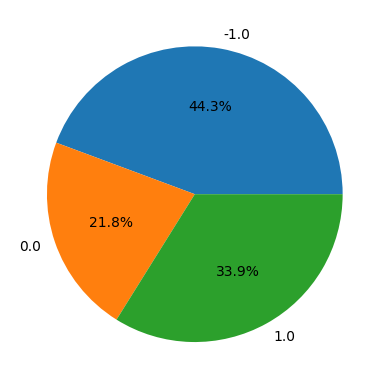

In [46]:
plt.pie(x=[num_posi_comm, num_neg_comm, num_neu_comm], labels = labels, autopct='%1.1f%%')

In [43]:
posi_comm

,clean_text,category
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0
...,...,...
162958,objective cover everything from akhlaq ramalin...,1.0
162959,raga knows dat wont spared modi courts for his...,1.0
162961,engine growth modi unveils indias first 12000 ...,1.0
162962,modi promised 2014 lok sabha elections that be...,1.0


In [50]:
posi_comm_len = posi_comm["clean_text"].apply(len).to_numpy()
neg_comm_len = neg_comm["clean_text"].apply(len).to_numpy()
neu_comm_len = neu_comm["clean_text"].apply(len).to_numpy()

In [141]:
lens = [neg_comm_len, neu_comm_len,posi_comm_len]
colors = ["m","y","c"]

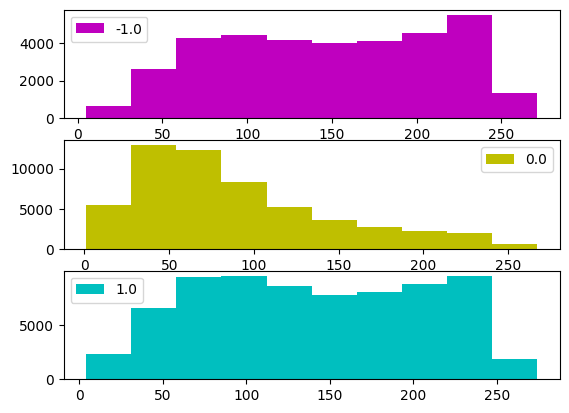

In [131]:
len_distribution , ax = plt.subplots(3,1)
for i, j in enumerate( zip (colors,lens,labels) ):
    color, x, label = j
    ax[i].hist(x, label = label, color = color)
    ax[i].legend()
    # ax[i].plot(x, stats.norm.pdf(x, mean(x), stdev(x)), color = color, label = label)

In [144]:
def save_fig (fig, path, name):
    if not os.path.exists(path):
        os.mkdir(path)
    fig.savefig(os.path.join(path,f"{name}.png"), bbox_inches = "tight")

In [145]:
save_fig(len_distribution,os.path.join(WORKDIR,"src"), "len_disti")

([<matplotlib.patches.Wedge at 0x7f16908905e0>,
 [Text(0.19480549803129887, 1.0826129585113868, '-1.0'),
  Text(-1.041199360962892, -0.3548293825635999, '0.0'),
  Text(0.5336129524419945, -0.9619029145325103, '1.0')],
 [Text(0.10625754438070846, 0.5905161591880291, '44.3%'),
  Text(-0.5679269241615774, -0.19354329958014538, '21.8%'),
  Text(0.291061610422906, -0.5246743170177328, '33.9%')])

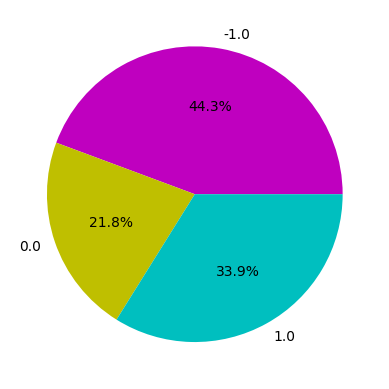

In [142]:
freq_distri, ax =  plt.subplots()
plt.pie(x=[num_posi_comm, num_neg_comm, num_neu_comm], colors = colors, labels = labels, autopct='%1.1f%%')

In [146]:
save_fig(freq_distri,os.path.join(WORKDIR,"src"), "freq_disti")